# **Fast Food Restaurants in America**

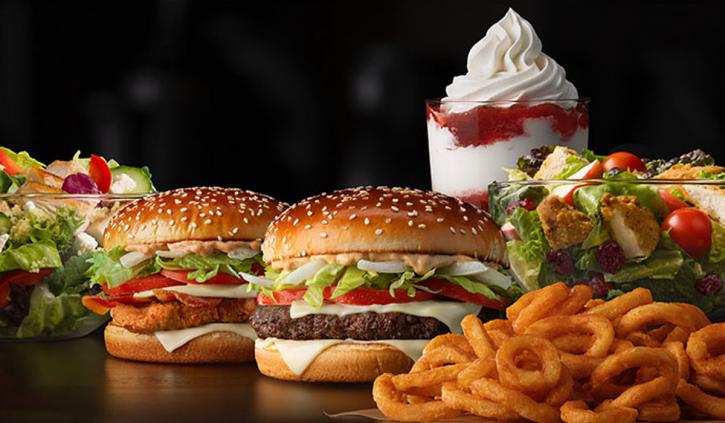

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd
import math

In [ ]:
pd.set_option("display.max_rows", 10)

**In this dataset, you will find over 10,000 different fast-food restaurants located all over the United States of America, which is represented below:**

In [ ]:
raw_data = pd.read_csv(r'../input/fast-food-restaurants-in-america/FastFoodRestaurants.csv')
raw_data

In [ ]:
raw_data.describe()

**Table has no null values except for websites column, which will not be used**

In [ ]:
raw_data.info()

In [ ]:
data1=raw_data.copy()

**To analyze the data names of the same restaurants in different locations shall be identical to each other. Therefore some symbols will be replaced below:**

In [ ]:
data1['name'] = data1['name'].str.replace("’","")
data1['name'] = data1['name'].str.replace("'","")
data1['name'] = data1['name'].str.replace(" ","")
data1['name'] = data1['name'].str.replace(".","")
data1['name'] = data1['name'].str.replace("-","")
data1['name'] = data1['name'].str.replace("&","AND")
data1['name'] = data1['name'].str.upper()

In [ ]:
data2 = data1.groupby(['name', 'city'])['name'].count()

In [ ]:
for_tree = data1['name'].value_counts(ascending=False).head(20).reset_index()
for_tree = for_tree.rename(columns={'index': 'name', 'name': 'count'})

**After cleaning the dataset let us depict some charts:**
* According to the *below bar* chart and *treemap*,McDonanlds has significant shares of a market
* on a second place there is a BurgerKing, which is half as much as McDonalds

In [ ]:
sns.set()
data1['name'].value_counts(ascending=False).head(20).plot(kind='barh', figsize=(12, 8))
plt.xlabel("Restaurants", labelpad=15)
plt.ylabel("Total Number of Restaurants by Names", labelpad=15)
plt.title("Total Number of Restaurants", y=1.02)

In [ ]:
plt.figure(figsize=(20, 10))
squarify.plot(sizes=for_tree['count'], label=for_tree['name'], alpha=.5,bar_kwargs={'alpha':1}, text_kwargs={'fontsize':10})
plt.axis('off')
plt.show()

**According to the bar chart of the total number of restaurants by cities, Cincinnati has the most number of fast food restaurants**

In [ ]:
data1['city'].value_counts().head(20).plot(kind='barh', figsize=(10, 8))
plt.xlabel("Cities", labelpad=15)
plt.ylabel("Total Number of Restaurants", labelpad=14)
plt.title("Total Number of Restaurants by Cities", y=1.02)

**Locations of the restaurants in Cincinnati can be seen below in a interactive map:**

In [ ]:
m_2 = folium.Map(location=[39.103119,-84.512016], tiles='cartodbpositron', zoom_start=11)

raw_data1 = raw_data[raw_data['city'] == 'Cincinnati']
# Add points to the map
for idx, row in raw_data1.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Display the map
m_2

**According to the bar chart of the total number of restaurants by province, CA**** has the most number of fast food restaurants**

In [ ]:
data1['province'].value_counts().head(20).plot(kind='barh', figsize=(10, 8))
plt.xlabel("Cities", labelpad=15)
plt.ylabel("Total Number of Restaurants", labelpad=14)
plt.title("Total Number of Restaurants by Cities", y=1.02)

In [ ]:
data2 = data1.groupby(['province', 'name'])['name'].count()

In [ ]:
mac_data = data1[data1.name == 'MCDONALDS']
bk_data = data1[data1.name == 'BURGERKING']
taco_data = data1[data1.name == 'TACOBELL']
wendys_data = data1[data1.name == 'WENDYS']
arbys_data = data1[data1.name == 'ARBYS']
rest_data = data1[(data1.name != 'MCDONALDS') & (data1.name != 'BURGERKING') & (data1.name != 'TACOBELL') & (data1.name != 'WENDYS') & (data1.name != 'ARBYS')]

**All the Fast Food Reastaurants in US can be seen in a below interactive map:**

In [ ]:
mcd = folium.Map(location=[40,-94], tiles='cartodbpositron', zoom_start=4)

# Add points to the map
mc = MarkerCluster()
for idx, row in data1.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
mcd.add_child(mc)

mcd

In [ ]:
per_state = data1.groupby(['province', 'name']).count().max(level=0)
per_state = per_state.rename(columns={'index': 'name', 'name': 'count'})
per_state = data1.groupby(['province', 'name'])['name'].count().reset_index(name='count')
per_state_all = per_state.groupby(['province']).count().reset_index()
per_state1 = per_state.groupby(['province'])['count'].max().reset_index()
per_state2 = pd.merge(per_state1, per_state, on=['province', 'count'])

**Lets import the geoJSON file with the US State boundaries**

In [ ]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"

# We read the file and print it.
geoJSON_df = gpd.read_file(state_geo)
geoJSON_df = geoJSON_df.rename(columns={'id': 'province'})
geoJSON_df = geoJSON_df.set_index("province")
geoJSON_df

In [ ]:
per_state3 = pd.merge(per_state2, geoJSON_df, on=['province'])
per_state3.drop_duplicates(subset ='province',
                     keep = 'last', inplace = True)
per_state4 = per_state3.set_index('province')
per_state4 = per_state4.drop(['name_x', 'name_y', 'count'], axis=1)

**With the imported State Boundaries and given dataset the count of fast food places can be seen per State:**

In [ ]:
# Create a base map
m = folium.Map(location=[40,-94], tiles='cartodbpositron', zoom_start=4)

# Add a choropleth map to the base map
folium.Choropleth(
    geo_data=geoJSON_df.__geo_interface__, 
    data=per_state_all,
    columns=['province', 'count'],
    key_on='feature.id',
).add_to(m)

# Display the map
m

**At last, in the map below, fast food leaders of each state is illustrated**

In [ ]:
per_state_new = per_state3.groupby('province')['name_x'].apply(lambda x: x.value_counts().head(1)).reset_index()
per_state_new1 = pd.merge(geoJSON_df, per_state_new, on=['province'])
per_state_new1 = per_state_new1.drop('name_x', axis=1)

per_state4 = per_state.groupby(['province', 'name'])['count'].sum().reset_index()
per_state4 = per_state4.rename({'name': 'level_1'}, axis=1)

per_state_new1 = pd.merge(per_state_new1, per_state4, on=['province', 'level_1'])
per_state_new1.head(15)

In [ ]:
import plotly.express as px

fig = px.choropleth(per_state_new1, geojson=geoJSON_df.__geo_interface__, color="level_1",
                    locations="province")

fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))

fig.show()

**According to the 2 maps above, McDonalds does not dominate in regions where fast food restaurants are not widespread**